# Chapter 6: Advanced Statistical Methods

## Bootstrap Estimator

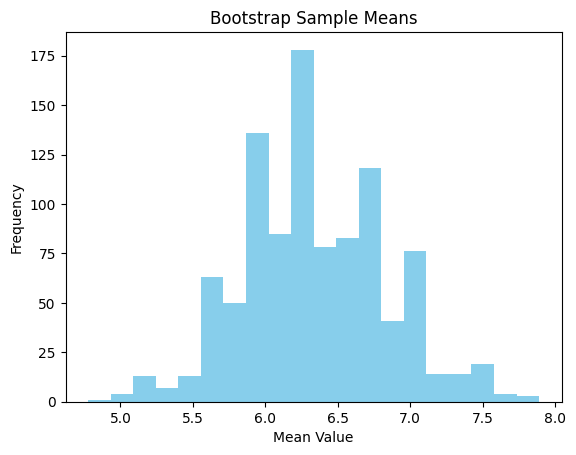

In [1]:
# Bootstrap Mean Estimate
# Import required libraries
import numpy as np                # For numerical operations and random sampling
import matplotlib.pyplot as plt   # For plotting the histogram

# Original data sample (a small dataset)
data = [5, 7, 8, 4, 9, 6, 7, 5, 6]

# Create an empty list to store the mean of each bootstrap sample
boot_means = []

# Repeat the resampling process 1000 times
for _ in range(1000):
    # Randomly sample data with replacement (same size as original data)
    sample = np.random.choice(data, size=len(data), replace=True)

    # Compute the mean of the resampled data and add it to the list
    boot_means.append(np.mean(sample))

# Plot a histogram of the bootstrap sample means
plt.hist(boot_means, bins=20, color='skyblue')
plt.title('Bootstrap Sample Means')    # Title of the plot
plt.xlabel('Mean Value')               # Label for the x-axis
plt.ylabel('Frequency')                # Label for the y-axis
plt.show()                             # Display the plot


In [ ]:
# Jackknife Estimate
# Original dataset (e.g., a small sample of values)
data = [5, 7, 8, 4, 9, 6, 7, 5, 6]

# Create an empty list to store the jackknife sample means
jackknife_means = []

# Loop over each data point to leave one out at a time
for i in range(len(data)):
    # Remove the i-th element to create a new sample (leave-one-out)
    subset = data[:i] + data[i+1:]

    # Calculate the mean of the reduced sample and store it
    jackknife_means.append(np.mean(subset))

# Print all the jackknife estimates (means from each subset)
print("Jackknife Estimates:", jackknife_means)


In [ ]:
# Jackknife for Sample Mean
import numpy as np  # Import NumPy library, which helps with math operations like finding the mean

# Example dataset (sample of 5 values)
data = [5, 7, 8, 4, 9]

# This list will store the Jackknife estimates (means of each leave-one-out sample)
jackknife_means = []

# Loop over each element in the data
for i in range(len(data)):
    # Create a new list that leaves out the i-th value (leave-one-out sample)
    sample = data[:i] + data[i+1:]  # This joins the part before and after index i
    # Compute the mean of this new sample and store it
    jackknife_means.append(np.mean(sample))

# Print all Jackknife estimates (each mean with one value removed)
print("Jackknife Estimates:", jackknife_means)


In [2]:
# Estimate Coefficient of Variation (CV) with Jackknife
import random, statistics  # Import modules for random number generation and basic statistics

# Set a random seed so the generated numbers will be the same each time (for reproducibility)
random.seed(5)

# Create a list of 100 random numbers between 0 and 10
# random.random() generates a float between 0 and 1, then we scale it by 10
PopData = [10 * random.random() for _ in range(100)]

# Define a function to calculate the Coefficient of Variation (CV)
# CV = standard deviation divided by the mean
def CVCalc(data):
    return statistics.stdev(data) / statistics.mean(data)

# Calculate the CV of the original dataset
CV_original = CVCalc(PopData)

# Print the result
print("CV of Original Data:", CV_original)


CV of Original Data: 0.6569398125747403


In [ ]:
# Jackknife CV Estimation in Python
# Get the number of data points in the original dataset
N = len(PopData)

# Create an empty list to store the Jackknife pseudo-values
PseudoVal = []

# Loop through each data point in the original dataset
for i in range(N):
    # Create a Jackknife sample by removing the i-th element
    JackSample = PopData[:i] + PopData[i+1:]

    # Calculate the CV for the Jackknife sample (statistic without one value)
    theta_i = CVCalc(JackSample)

    # Calculate the Jackknife pseudo-value using the formula:
    # θ*_i = N * θ - (N - 1) * θ_i
    # This adjusts the estimate to reduce bias
    pseudo = N * CV_original - (N - 1) * theta_i

    # Add the pseudo-value to the list
    PseudoVal.append(pseudo)

# Calculate and print the average of the pseudo-values
print("Mean Pseudo Value:", statistics.mean(PseudoVal))

# Calculate and print the variance of the pseudo-values
print("Variance:", statistics.variance(PseudoVal))

# Estimate the Jackknife variance (divide the variance of pseudo-values by N)
print("Jackknife Variance Estimate:",
      statistics.variance(PseudoVal)/N)


In [5]:
# Bootstrapping in Python
import random, numpy as np  # Import modules for random numbers and math operations

# Set the random seed to make sure we get the same numbers every time we run this code
random.seed(7)

# Create a list of 1000 random numbers between 0 and 50
# random.random() gives a number between 0 and 1; multiplying by 50 scales it to 0–50
PopData = [50 * random.random() for _ in range(1000)]

# From PopData, randomly pick 100 numbers with replacement to make a sample
# 'replacement' means each number can be picked more than once
PopSample = random.choices(PopData, k=100)

# Create an empty list to store the means of bootstrap samples
PopSampleMean = []

# Repeat 10,000 times to create many bootstrap samples
for _ in range(10000):
    # Randomly select 100 values from PopData with replacement to form a bootstrap sample
    SampleI = random.choices(PopData, k=100)

    # Calculate the mean of this bootstrap sample
    sample_mean = np.mean(SampleI)

    # Add the mean to the list of bootstrap sample means
    PopSampleMean.append(sample_mean)



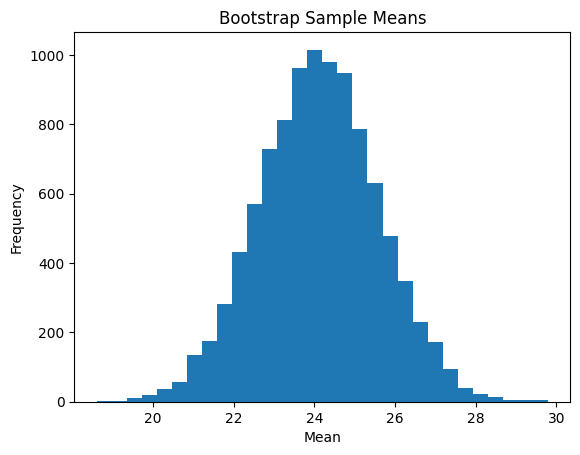

In [6]:
# # Bootstrapping in Python
import matplotlib.pyplot as plt

# Plot histogram of bootstrap sample means
plt.hist(PopSampleMean, bins=30)
plt.title("Bootstrap Sample Means")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Calculate the average of all bootstrap sample means
MeanPopSampleMean = np.mean(PopSampleMean)

# Calculate the average of the entire original population data
MeanPopData = np.mean(PopData)

# Calculate the average of the single random sample we drew earlier
MeanPopSample = np.mean(PopSample)

# Print the mean from the bootstrap samples
print("Bootstrap Mean:", MeanPopSampleMean)

# Print the mean of the original population data
print("Population Mean:", MeanPopData)

# Print the mean of the one random sample
print("Sample Mean:", MeanPopSample)


Bootstrap Mean: 24.105354873028915
Population Mean: 24.087053989747968
Sample Mean: 23.140472976536497


In [10]:
# Step 1: Simulate Initial Data
import numpy as np
import random
import matplotlib.pyplot as plt

# Set random seed for consistent results
random.seed(0)
np.random.seed(0)

# Create 100 x-values between 0 and 10
x = np.linspace(0, 10, 100)

# Generate y-values using a linear model plus some noise
y = 1.5 * x + np.random.normal(0, 2, 100)

In [11]:
# Step 2: Define the Bootstrap Process
from sklearn.linear_model import LinearRegression

# Store results from each bootstrapped model
boot_slopes = []
boot_intercepts = []
r_sqs = []

# Repeat 500 times: resample and fit a line
for _ in range(500):
    # Randomly select 100 indices with replacement
    idx = np.random.choice(range(100), size=100, replace=True)

    # Create bootstrap sample
    x_sample = x[idx].reshape(-1, 1)
    y_sample = y[idx]

    # Fit linear regression to the sample
    model = LinearRegression().fit(x_sample, y_sample)

    # Save slope, intercept, and R^2
    boot_slopes.append(model.coef_[0])
    boot_intercepts.append(model.intercept_)
    r_sqs.append(model.score(x_sample, y_sample))

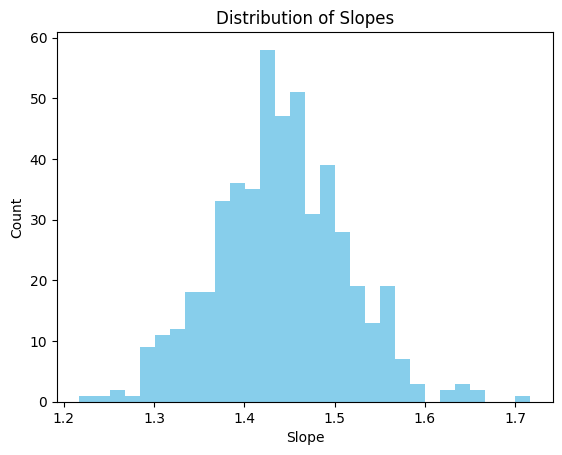

In [12]:
# Plot histogram of slopes from 500 models
plt.hist(boot_slopes, bins=30, color='skyblue')
plt.title("Distribution of Slopes")
plt.xlabel("Slope")
plt.ylabel("Count")
plt.show()

In [13]:
# Find model with highest R-squared (best fit)
best_rsq = max(r_sqs)
best_index = r_sqs.index(best_rsq)

# Get slope and intercept for that model
best_slope = boot_slopes[best_index]
best_intercept = boot_intercepts[best_index]

print("Best R-squared:", best_rsq)
print("Best slope:", best_slope)
print("Best intercept:", best_intercept)

Best R-squared: 0.8919867039206032
Best slope: 1.572966119341178
Best intercept: -0.2812468953384295


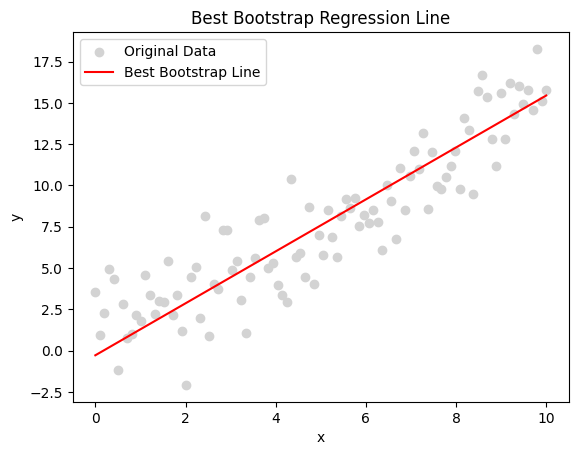

In [14]:
# Plot original data points
plt.scatter(x, y, color='lightgray', label='Original Data')

# Plot the best regression line
y_best = best_slope * x + best_intercept
plt.plot(x, y_best, color='red', label='Best Bootstrap Line')

plt.legend()
plt.title("Best Bootstrap Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
# Permutation Test in Python (with Comments)
import numpy as np
import random

# Two sample groups (e.g., two teaching methods)
group1 = [88, 92, 85, 90, 87]     # Group A scores
group2 = [80, 79, 83, 77, 82]     # Group B scores

# Compute observed difference in means
obs_diff = abs(np.mean(group1) - np.mean(group2))

# Combine all data into one list
combined = group1 + group2

# Run permutation test
count = 0
for _ in range(10000):
    random.shuffle(combined)              # Shuffle scores randomly
    new_g1 = combined[:5]                 # First 5 become group1
    new_g2 = combined[5:]                 # Rest become group2
    diff = abs(np.mean(new_g1) - np.mean(new_g2))
    if diff >= obs_diff:                 # Compare with observed difference
        count += 1

# Calculate p-value: how often was the random difference ≥ actual?
p_value = count / 10000
print("Permutation test p-value:", p_value)

Permutation test p-value: 0.0085


In [ ]:
# Python Example: Simple Linear Fit with Validation
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate simple synthetic data: X is feature, y is target
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([2, 4, 6, 8, 10, 12])  # Perfect linear relationship: y = 2 * X

# Split data into training set and validation set
# test_size=0.33 means 33% of data is for validation, 67% for training
# random_state=1 fixes the random split for reproducibility
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)

# Create a Linear Regression model object
model = LinearRegression()

# Train the model using the training data (X_train, y_train)
model.fit(X_train, y_train)

# Use the trained model to predict the target values for validation data (X_val)
y_pred = model.predict(X_val)

# Calculate the Mean Squared Error (MSE) between predicted and actual validation targets
val_error = mean_squared_error(y_val, y_pred)

# Print the validation error to evaluate model performance on unseen data
print("Validation Error (MSE):", val_error)


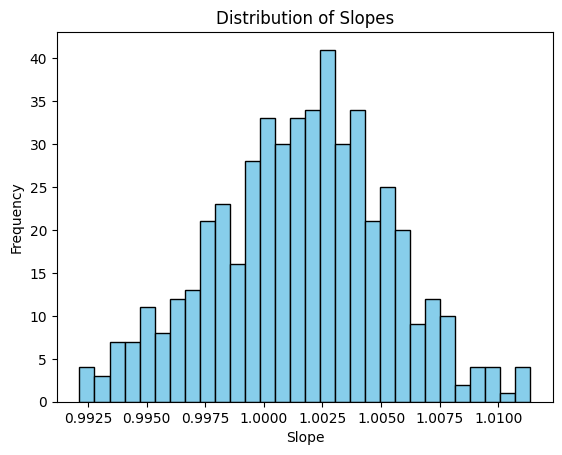

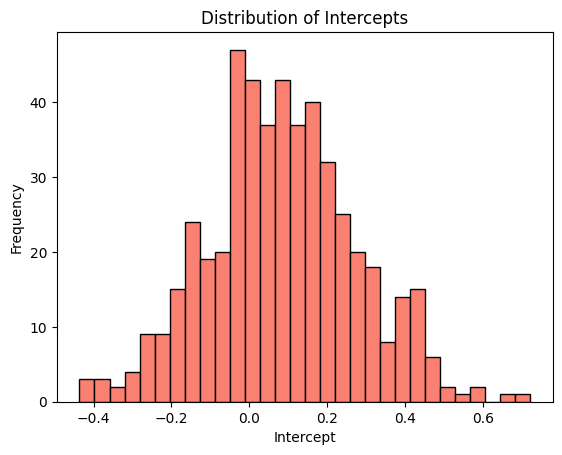

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create reproducible data: 100 (x, y) pairs where y = x + noise
random.seed(1)
x = [i + random.uniform(-1, 1) for i in range(100)]  # input variable with slight randomness
y = [val + random.gauss(0, 1) for val in x]          # output = input + Gaussian noise
# Convert x to a 2D array for sklearn
x_np = np.array(x).reshape(-1, 1)
y_np = np.array(y)

# Fit original regression model to full data
orig_model = LinearRegression()
orig_model.fit(x_np, y_np)

# Save original R^2 score
orig_r_sq = orig_model.score(x_np, y_np)
boot_slopes = []     # Stores slope of each resample
boot_interc = []     # Stores intercept of each resample
r_sqs = []           # Stores R^2 of each resample

for _ in range(500):  # Perform 500 bootstrap iterations
    # Random sample (with replacement) of indices
    indices = random.choices(range(len(x)), k=len(x))
    x_boot = np.array([x[i] for i in indices]).reshape(-1, 1)
    y_boot = np.array([y[i] for i in indices])

    # Fit regression model to the bootstrapped sample
    model = LinearRegression()
    model.fit(x_boot, y_boot)

    # Store slope, intercept, and R^2
    boot_slopes.append(model.coef_[0])
    boot_interc.append(model.intercept_)
    r_sqs.append(model.score(x_boot, y_boot))
# Plot slope distribution
plt.hist(boot_slopes, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Slopes")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()

# Plot intercept distribution
plt.hist(boot_interc, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Intercepts")
plt.xlabel("Intercept")
plt.ylabel("Frequency")
plt.show()

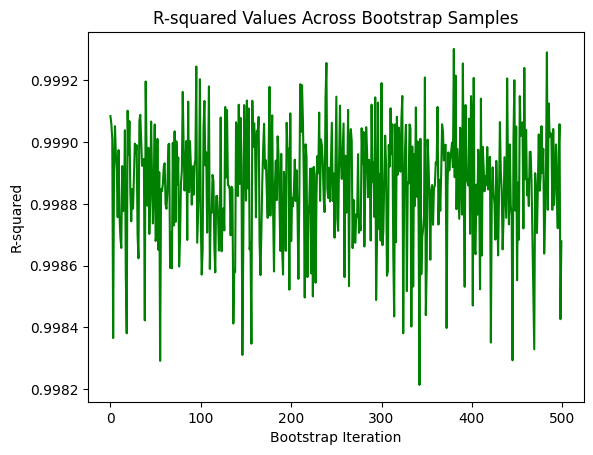

Max R squared = 0.9993018678909845


In [17]:
# Plot R^2 values from all models
plt.plot(r_sqs, color='green')
plt.title("R-squared Values Across Bootstrap Samples")
plt.xlabel("Bootstrap Iteration")
plt.ylabel("R-squared")
plt.show()

# Find max R-squared value and corresponding model parameters
max_r_sq = max(r_sqs)
pos_max_r_sq = r_sqs.index(max_r_sq)
print(f"Max R squared = {max_r_sq}")

In [18]:
# Retrieve slope and intercept of best-performing model
max_slope = boot_slopes[pos_max_r_sq]
max_interc = boot_interc[pos_max_r_sq]

print(f"Slope of best model = {max_slope}")
print(f"Intercept of best model = {max_interc}")

Slope of best model = 1.0071331136940875
Intercept of best model = -0.26992848662330715


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

PopData = list()

random.seed(7)

for i in range(1000):
    DataElem = 50 * random.random()
    PopData.append(DataElem)

PopSample = random.choices(PopData, k=100)

PopSampleMean = list()
for i in range(10000):
    SampleI = random.choices(PopData, k=100)
    PopSampleMean.append(np.mean(SampleI))

plt.hist(PopSampleMean)
plt.show()

MeanPopSampleMean = np.mean(PopSampleMean)
print('The mean of the Bootstrap estimator is ', MeanPopSampleMean)

MeanPopData = np.mean(PopData)
print('The mean of the population is ', MeanPopData)

MeanPopSample = np.mean(PopSample)
print('The mean of the simple random sample is ', MeanPopSample)

## Bootstrap Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

x = np.linspace(0, 1, 100)
y = x + (np.random.rand(len(x)))

for i in range(30):
    x = np.append(x, np.random.choice(x))
    y = np.append(y, np.random.choice(y))

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

reg_model = LinearRegression().fit(x, y)

r_sq = reg_model.score(x, y)
print(f'R squared = {r_sq}')

alpha = float(reg_model.coef_[0])
print(f'slope: {reg_model.coef_}')
beta = float(reg_model.intercept_[0])
print(f'intercept: {reg_model.intercept_}')

y_pred = reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

boot_slopes = []
boot_interc = []
r_sqs = []
n_boots = 500
num_sample = len(x)
data = pd.DataFrame({'x': x[:,0], 'y': y[:,0]})

plt.figure()
for k in range(n_boots):
    sample = data.sample(n=num_sample, replace=True)
    x_temp = sample['x'].values.reshape(-1, 1)
    y_temp = sample['y'].values.reshape(-1, 1)
    reg_model = LinearRegression().fit(x_temp, y_temp)
    r_sqs_temp = reg_model.score(x_temp, y_temp)
    r_sqs.append(r_sqs_temp)
    boot_interc.append(float(reg_model.intercept_[0]))
    boot_slopes.append(float(reg_model.coef_[0]))
    y_pred_temp = reg_model.predict(x_temp)
    plt.plot(x_temp, y_pred_temp, color='grey', alpha=0.2)

plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

sns.histplot(data=boot_slopes, kde=True)
plt.show()
sns.histplot(data=boot_interc, kde=True)
plt.show()

plt.plot(r_sqs)

max_r_sq = max(r_sqs)
print(f'Max R squared = {max_r_sq}')

pos_max_r_sq = r_sqs.index(max(r_sqs))
print(f'Boot of the best Regression model = {pos_max_r_sq}')

max_slope = boot_slopes[pos_max_r_sq]
print(f'Slope of the best Regression model = {max_slope}')

max_interc = boot_interc[pos_max_r_sq]
print(f'Intercept of the best Regression model = {max_interc}')

## Jackknife Estimator

In [ ]:
import random
import statistics
import matplotlib.pyplot as plt

PopData = list()

random.seed(5)

for i in range(100):
    DataElem = 10 * random.random()
    PopData.append(DataElem)

def CVCalc(Dat):
    CVCalc = statistics.stdev(Dat) / statistics.mean(Dat)
    return CVCalc

CVPopData = CVCalc(PopData)
print(CVPopData)

N = len(PopData)
JackVal = list()
PseudoVal = list()
for i in range(N-1):
    JackVal.append(0)
for i in range(N):
    PseudoVal.append(0)

for i in range(N):
    for j in range(N):
        if(j < i):
            JackVal[j] = PopData[j]
        else:
            if(j > i):
                JackVal[j-1] = PopData[j]
    PseudoVal[i] = N * CVCalc(PopData) - (N-1) * CVCalc(JackVal)

plt.hist(PseudoVal)
plt.show()

MeanPseudoVal = statistics.mean(PseudoVal)
print(MeanPseudoVal)
VariancePseudoVal = statistics.variance(PseudoVal)
print(VariancePseudoVal)
VarJack = statistics.variance(PseudoVal) / N
print(VarJack)

## K-Fold Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

StartedData = np.arange(10, 110, 10)
print(StartedData)

kfold = KFold(5, True, 1)

for TrainData, TestData in kfold.split(StartedData):
    print('Train Data :', StartedData[TrainData], 'Test Data :', StartedData[TestData])

## Permutation Test

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree
from sklearn.model_selection import permutation_test_score
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris()
X = data.data
y = data.target

np.random.seed(0)
X_nc_data = np.random.normal(size=(len(X), 4))

clf = tree.DecisionTreeClassifier(random_state=1)

p_test_iris = permutation_test_score(
    clf, X, y, scoring='accuracy', n_permutations=1000
)

print(f'Score of iris flower classification = {p_test_iris[0]}')
print(f'P_value of permutation test for iris dataset = {p_test_iris[2]}')

p_test_nc_data = permutation_test_score(
    clf, X_nc_data, y, scoring='accuracy', n_permutations=1000
)

print(f'Score of no-correletd data classification = {p_test_nc_data[0]}')
print(f'P_value of permutation test for no-correletd dataset = {p_test_nc_data[2]}')

pbox1 = sns.histplot(data=p_test_iris[1], kde=True)
plt.axvline(p_test_iris[0], linestyle='-', color='r')
plt.axvline(p_test_iris[2], linestyle='--', color='b')
pbox1.set(xlim=(0,1))
plt.show()

pbox2 = sns.histplot(data=p_test_nc_data[1], kde=True)
plt.axvline(p_test_nc_data[0], color='r', linestyle='-')
plt.axvline(p_test_nc_data[2], color='b', linestyle='--')
pbox2.set(xlim=(0,1))
plt.show()